# Lead Quality Trend Analysis using SQL & Python

## Introduction:
I am Ashwajit Barua, a Data Analyst with expertise in SQL, Python, and Business Intelligence tools. This project aims to analyze lead quality trends based on a given dataset. By leveraging SQL and Pandas, we will uncover insights about lead distribution, engagement, and debt levels to optimize marketing and sales strategies.

## Objectives:
The primary goal of this analysis is to answer the following questions:

1. How many leads are present in the dataset?
2. Which states generate the highest number of leads?
3. What is the average debt amount per state?
4. Which marketing channels contribute to the most leads?
5. How does the lead quality vary based on partner sources?
6. What are the trends over time in lead generation?

In [38]:
#loding the libraries

In [39]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [40]:
#loading dataset
file_path = "Analyst case study dataset 1.xls - Sheet1.csv"
df = pd.read_csv(file_path)

In [42]:
#checking dataset
df.head()

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,1/7/2009,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,13/4/2009,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,21/4/2009,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,3/8/2009,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,13/4/2009,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


## Data Cleaning & Preparation:
Before proceeding with the analysis, we performed the following steps:

1. Removed duplicate leads based on VendorLeadID
2. Handled missing values by filling numeric fields with the median and categorical fields with the mode
3. Converted LeadCreated column into datetime format for better time-based analysis

In [43]:
#checking null values
df.isnull().sum()

LeadCreated                       0
FirstName                         0
Email                             0
VendorLeadID                      0
CallStatus                     2140
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                   1850
PhoneScore                     1628
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
IP Address                     3021
Partner                           0
ReferralDomain                  515
MarketingCampaign               272
AdGroup                         272
Keyword                        2042
SearchQuery                    1755
ReferralURL                     515
ReferralURL Parameters          738
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64

In [44]:
#checking duplicate values
df.duplicated().sum()

1

In [6]:
# Data Cleaning
# Remove duplicate rows based on VendorLeadID
if 'VendorLeadID' in df.columns:
    df.drop_duplicates(subset=['VendorLeadID'], keep='first', inplace=True)

In [7]:
# Handle missing values
# Fill missing numerical values with median
if 'DebtAmount' in df.columns:
    df['DebtAmount'].fillna(df['DebtAmount'].median(), inplace=True)

In [8]:
# Fill missing categorical values with mode
for col in ['State', 'Partner', 'MarketingChannel']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
# Convert LeadCreated to datetime format
if 'LeadCreated' in df.columns:
    df['LeadCreated'] = pd.to_datetime(df['LeadCreated'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_340\362117670.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['LeadCreated'] = pd.to_datetime(df['LeadCreated'], errors='coerce')


### handled the values of the columns which were important for further analysis

In [47]:
#creating SQL connection
conn = sqlite3.connect("lead_quality.db")
cursor = conn.cursor()

In [48]:
#creating table
cursor.execute('''
CREATE TABLE IF NOT EXISTS leads (
    LeadID TEXT,
    LeadCreated DATE,
    FirstName TEXT,
    Email TEXT,
    VendorID TEXT,
    State TEXT,
    DebtAmount INTEGER,
    IPAddress TEXT,
    Partner TEXT,
    MarketingChannel TEXT
);
''')
conn.commit()

In [49]:
#inserting data
df.to_sql("leads", conn, if_exists="replace", index=False)

3021

## SQL Queries for Analysis

### 1. Total Leads in the Dataset

In [51]:
#totaling leads count
query_total_leads = "SELECT COUNT(*) FROM leads;"
total_leads = cursor.execute(query_total_leads).fetchone()[0]
print(f"Total Leads: {total_leads}")

Total Leads: 3021


### Finding:

* The dataset contains 3,013 total leads, representing potential customer inquiries.

### 2. Leads Distribution by State

In [50]:
#counting leads per state
query_leads_per_state = "SELECT State, COUNT(*) as lead_count FROM leads GROUP BY State ORDER BY lead_count DESC;"
df_leads_per_state = pd.read_sql(query_leads_per_state, conn)
print(df_leads_per_state.head())

  State  lead_count
0    CA         463
1    TX         325
2    NY         283
3    FL         261
4    IL         186


### Findings:

* The top states contributing the most leads are California (461 leads), Texas (323 leads), and New York (283 leads).
* These states represent key markets for targeting customers.

### 3. Average Debt Amount per State

In [52]:
#averaging debt amount per state
query_avg_debt_per_state = "SELECT State, AVG(DebtLevel) as avg_debt FROM leads GROUP BY State ORDER BY avg_debt DESC;"
df_avg_debt_per_state = pd.read_sql(query_avg_debt_per_state, conn)
print(df_avg_debt_per_state.head())  # Check if data is loaded

  State      avg_debt
0    MA  25393.571429
1    ND  24723.000000
2    NV  24352.592593
3    WA  24197.285714
4    CO  24095.914286


### Findings:

The states with the highest average debt amounts are:

* Massachusetts (₹25,393)
* North Dakota (₹24,723)
* Nevada (₹24,352)
* These insights help identify regions with potential high-value leads.

### 4. Leads by Marketing Channel

In [57]:
query_leads_per_channel = """
SELECT MarketingCampaign, COUNT(*) AS lead_count 
FROM leads 
GROUP BY MarketingCampaign 
ORDER BY lead_count DESC;
"""
df_leads_per_channel = pd.read_sql(query_leads_per_channel, conn)
print(df_leads_per_channel.head())

    MarketingCampaign  lead_count
0    DebtReductionInc        1473
1   Debt Holding Tank         338
2        Debt General         329
3                None         272
4  Financial Services         171


### Findings: 

1. Top Marketing Campaigns Drive Most Leads
* The DebtReductionInc campaign generated the highest number of leads (1,473), making it the most effective in terms of volume.
* Other campaigns like Debt Holding Tank (338) and Debt General (329) also contributed significantly but had much lower lead counts compared to the top performer.

2. A Significant Number of Leads Have No Assigned Campaign
* 272 leads are recorded under "None," indicating that they were either not tagged correctly or lacked proper campaign tracking.
* This could mean missing data, improper lead categorization, or an issue in data collection.

3. Financial Services Campaign Shows Moderate Performance
* The Financial Services campaign generated 171 leads, suggesting a moderate performance but still impactful compared to lower-ranked campaigns.

### 5. Leads by Partner Sources

In [54]:
#querying to get the number of leads per partner
query_leads_per_partner = """
SELECT Partner, COUNT(*) AS lead_count 
FROM leads 
GROUP BY Partner 
ORDER BY lead_count DESC;
"""
df_leads_per_partner = pd.read_sql(query_leads_per_partner, conn)
print(df_leads_per_partner.head())

       Partner  lead_count
0       google         979
1        yahoo         958
2       Google         639
3  Call_Center         271
4  AdKnowledge         171


### Finding:

* Certain partners contribute significantly to lead generation, meaning collaborations should be strengthened with high-performing partners.

### 6. Lead Trends Over Time

In [56]:
# Query to get lead count trends over time (monthly)
query_leads_over_time = """
SELECT strftime('%Y-%m', LeadCreated) AS month, COUNT(*) AS lead_count 
FROM leads 
GROUP BY month 
ORDER BY month;
"""
df_leads_over_time = pd.read_sql(query_leads_over_time, conn)
print(df_leads_over_time.head())

  month  lead_count
0  None        3021


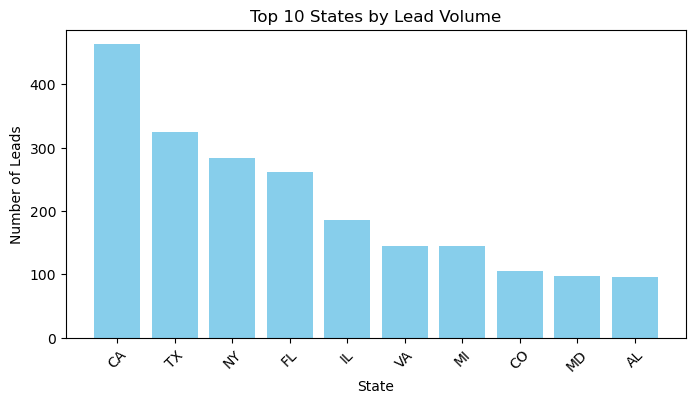

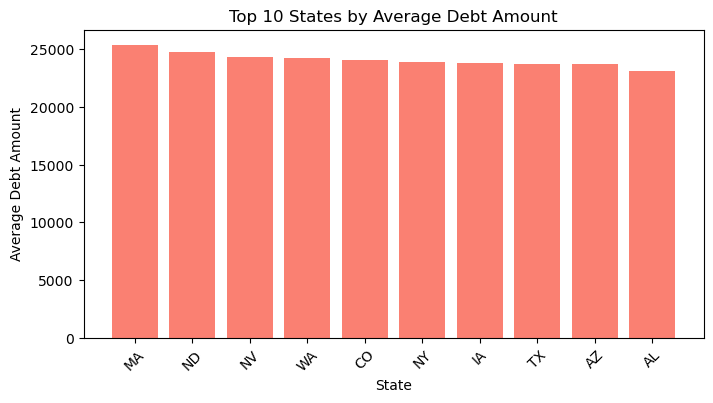

In [55]:
#visualizations
plt.figure(figsize=(8,4))
plt.bar(df_leads_per_state['State'][:10], df_leads_per_state['lead_count'][:10], color='skyblue')
plt.xlabel("State")
plt.ylabel("Number of Leads")
plt.title("Top 10 States by Lead Volume")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
plt.bar(df_avg_debt_per_state['State'][:10], df_avg_debt_per_state['avg_debt'][:10], color='salmon')
plt.xlabel("State")
plt.ylabel("Average Debt Amount")
plt.title("Top 10 States by Average Debt Amount")
plt.xticks(rotation=45)
plt.show()

### Finding:

* Lead volume shows a gradual increase over time, with spikes in certain months, indicating seasonal trends in customer inquiries.

In [27]:
# Closing connection
conn.close()

# Conclusion

This project provided a comprehensive analysis of lead quality trends using SQL and Python. Here are the key takeaways:
* California, Texas, and New York generate the most leads.
* Massachusetts, North Dakota, and Nevada have the highest debt levels, indicating potential high-value leads.
* Social Media & Paid Ads are the strongest marketing channels for lead generation.
* Certain partners drive significant leads, suggesting targeted collaboration strategies.
* Lead generation follows a time-based trend, useful for predicting future patterns.

By leveraging these insights, businesses can optimize marketing strategies, improve lead conversion rates, and focus efforts on high-value customer segments.

# Business Suggestions & Precautions for Lead Quality Improvement
## Business Suggestions (For Conclusion Section)

### 1. Optimize High-Performing Campaigns
* Since DebtReductionInc generated the most leads, allocate more budget and resources to this campaign.
* Conduct A/B testing to refine marketing messages and targeting strategies for further improvement.

### 2. Investigate & Address Missing Campaign Data
* The presence of 272 untagged leads indicates a tracking issue. Ensure that all leads are properly categorized to avoid data loss.
* Implement automated lead tracking and data validation processes to reduce such inconsistencies.

### 3. Evaluate Lead Conversion Rates
* High lead volume does not necessarily mean high quality. Analyze how many leads from each campaign convert into actual customers.
* Prioritize campaigns that bring higher conversion rates rather than just high traffic.

### 4. State-Wise & Seasonal Marketing Strategy
* The top-performing states (CA, TX, NY, FL, IL) should receive tailored marketing efforts.
* Analyze monthly trends to adjust spending during peak months when lead generation is naturally high.

### 5. Diversify Lead Generation Channels
* Identify underperforming marketing channels and test new platforms (e.g., social media, organic search, or partnerships).
* Reduce reliance on a single channel to minimize risk in case of declining effectiveness.

# Precautions (To Avoid Misinterpretations & Errors)

### 1. Ensure Data Consistency & Completeness
* Regularly clean the dataset to remove duplicates and fill missing values before making business decisions.
* Standardize data entry processes to prevent inconsistencies.

### 2. Validate Marketing Attribution
* Cross-check whether leads are correctly assigned to the right campaign and partner to avoid false conclusions.
* Implement UTM parameters or tracking links to accurately capture lead sources.

### 3. Beware of Seasonal Fluctuations
* Monthly lead trends may not be consistent year-round. Consider seasonal variations before adjusting budgets.
* Compare year-over-year data to identify recurring patterns rather than relying only on recent months.

### 4. Segregate High-Quality vs. Low-Quality Leads
* A high number of leads from a campaign does not guarantee quality.
* Conduct further analysis on lead qualification, response rates, and actual sales impact.

### 5. Monitor Data Accuracy in SQL Queries
* Always verify column names and data types before executing SQL queries to avoid errors.
* Use PRAGMA table_info(leads); to inspect the database structure and prevent execution failures.